# Imports:

In [1]:
from pathlib import Path

from common import SenoidSignal, Audio
from dsb_modulation import ModulatedSignal as DSBModulation

AUDIO_PATH = Path(r'toy_train_whistle.wav')

# Modulação AM-DSB de um sinal senoidal $m(t) = A_c \sin{\left( 2 \pi f_m t + \phi_0 \right)}$:

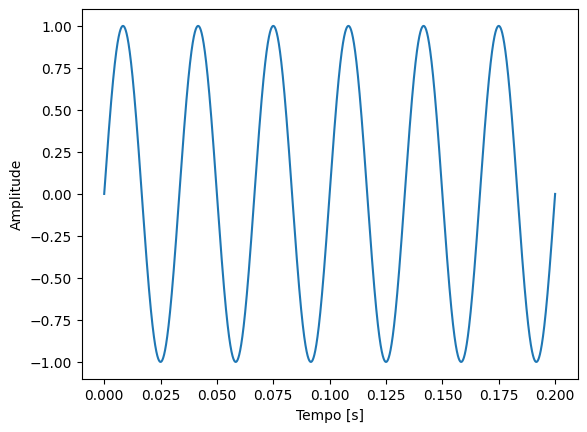

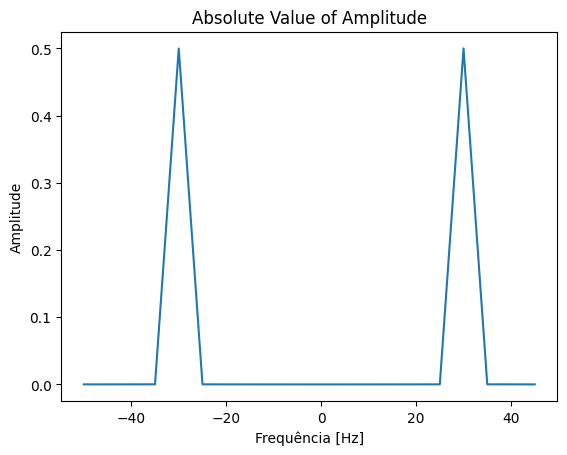

In [2]:
SENOID_FREQUENCY = 30  # Hertz
SAMPLE_RATE = 100_000  # Hertz
SAMPLE_TIME = 0.2  # seconds
SENOID_AMPLITUDE = 1
SENOID_PHASE = 0  # degrees

signal = SenoidSignal(SENOID_FREQUENCY, SAMPLE_RATE, SAMPLE_TIME, amplitude=SENOID_AMPLITUDE, phase=SENOID_PHASE)
signal.plot_data()
signal.plot_fourier(start_index=(signal.sample_number//2 - 10), end_index=(signal.sample_number//2 + 10))

[-0.00094253-0.00000000e+00j -0.00094253-1.48051520e-07j
 -0.00094253-2.96103036e-07j ... -0.00094253+4.44154565e-07j
 -0.00094253+2.96103036e-07j -0.00094253+1.48051520e-07j]


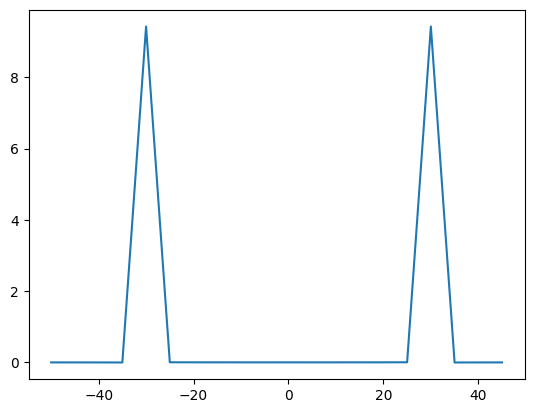

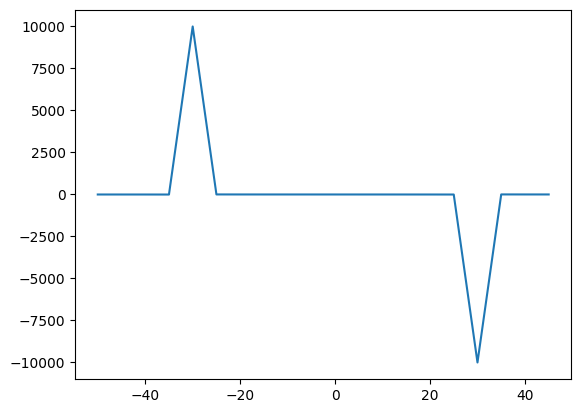

9.424539544633305 9999.744071840201


In [3]:
import numpy as np
import scipy.fft as sfft
import matplotlib.pyplot as plt

fourier = sfft.fftshift(sfft.fft(signal.data_array))
#fourier = np.fft.fftshift(np.fft.rfft(signal.data_array))
sample_frequencies = sfft.fftshift(sfft.fftfreq(signal.sample_number, 1/signal.sample_rate))
print(fourier)
plt.figure()
plt.plot(sample_frequencies[9990:10010], np.real(fourier)[9990:10010])
plt.show()
plt.figure()
plt.plot(sample_frequencies[9990:10010], np.imag(fourier)[9990:10010])
plt.show()
print(np.real(fourier).max(), np.imag(fourier).max())

In [4]:
np.real(fourier)[9994]
sample_frequencies[9994]

-30.0

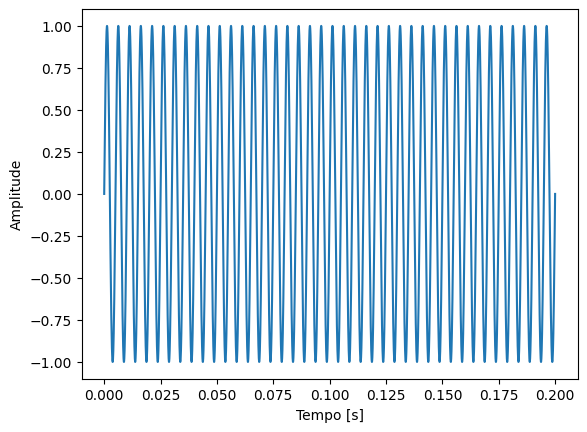

In [5]:
CARRIER_FREQUENCY = 200  # Hertz
CARRIER_AMPLITUDE = 1
CARRIER_PHASE = 0  # degrees

carrier = SenoidSignal(CARRIER_FREQUENCY, SAMPLE_RATE, SAMPLE_TIME, amplitude=CARRIER_AMPLITUDE, phase=CARRIER_PHASE)
carrier.plot_data()

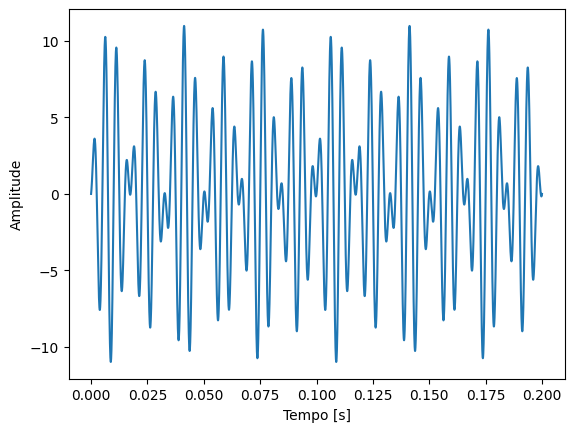

In [6]:
K_A = 10

modulated = DSBModulation(signal, carrier, K_A)
modulated.plot_data()

# Aplicação da modulação AM-DSB acima para um sinal de áudio:

In [7]:
train_whistle = Audio(AUDIO_PATH)

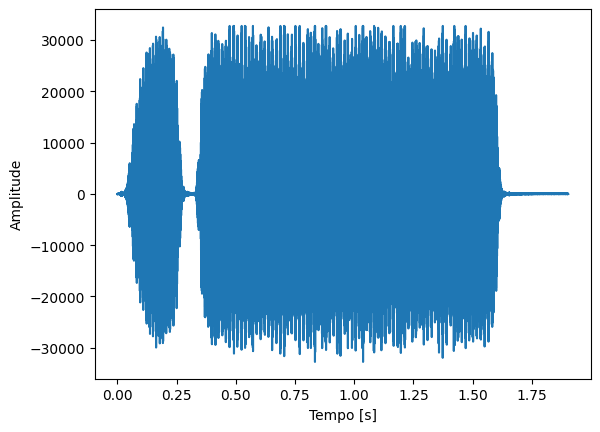

In [8]:
train_whistle.plot_data()

# Modulação AM-DSB-SC de um sinal senoidal $m(t) = \sin{\left( 2 \pi f_m t \right)}$:

# Aplicação da modulação AM-DSB-SC acima para um sinal de áudio:

# Modulação AM-SSB de um sinal senoidal $m(t) = \sin{\left( 2 \pi f_m t \right)}$:

# Aplicação da modulação AM-SSB acima para um sinal de áudio: